In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LOADING DATASET
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Plotting graphs of important variables

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26816\891408485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_length"])


<Axes: xlabel='sepal_length', ylabel='Density'>

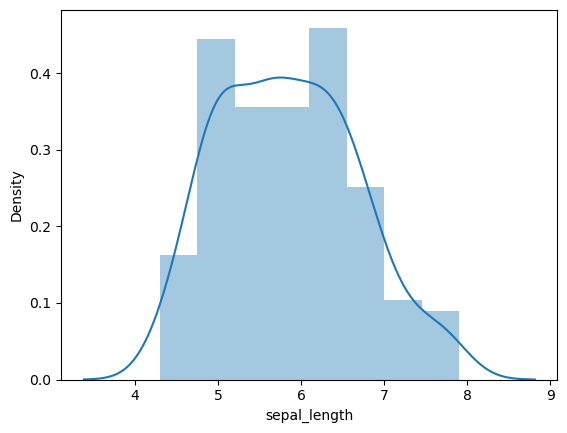

In [10]:
sns.distplot(df["sepal_length"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26816\664177273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_width"])


<Axes: xlabel='sepal_width', ylabel='Density'>

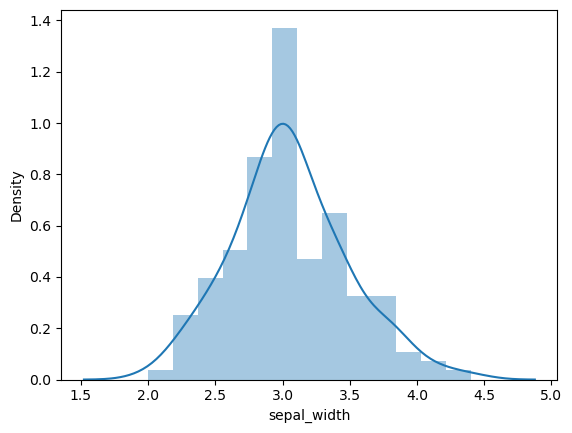

In [11]:
sns.distplot(df["sepal_width"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26816\2807225282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal_length"])


<Axes: xlabel='petal_length', ylabel='Density'>

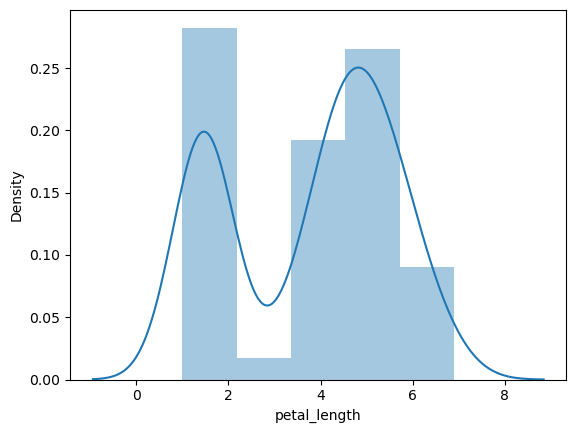

In [12]:
sns.distplot(df["petal_length"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26816\3919348056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal_width"])


<Axes: xlabel='petal_width', ylabel='Density'>

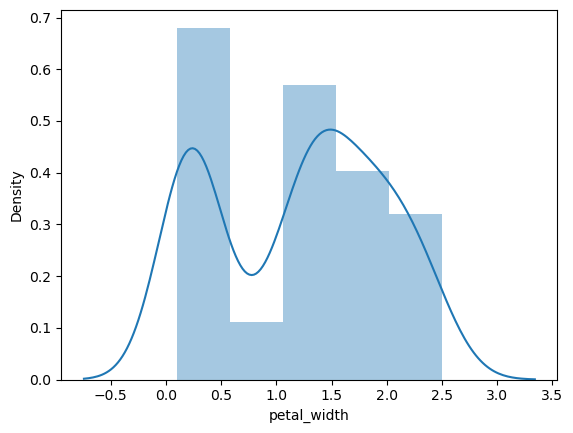

In [13]:
sns.distplot(df["petal_width"])

<Axes: xlabel='species', ylabel='count'>

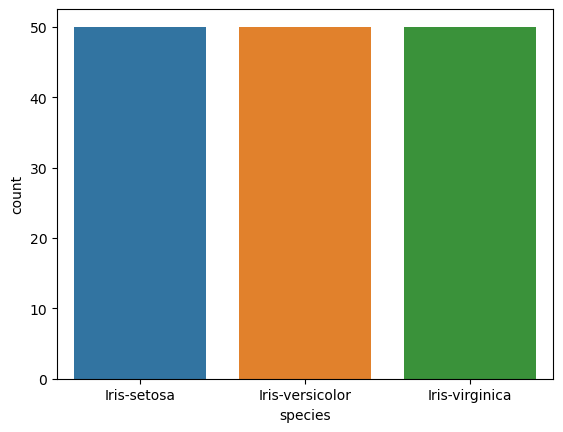

In [15]:
sns.countplot(x="species",data=df)

In [17]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
for i in ["species"]:
    df[i]=a.fit_transform(df[i])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
X.shape

(150, 4)

In [20]:
y.shape

(150,)

In [21]:
#SPLITTING DATA INTO TRAINING AND TESTING
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=99)

In [22]:
clf=RandomForestClassifier()

In [23]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
#IMPORTANCE OF EACH VARIABLE WITH OUR TARGET VARIABLE I.E SPECIES
clf.feature_importances_

array([0.10431108, 0.02466444, 0.4828266 , 0.38819788])

In [27]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
112,6.8,3.0,5.5,2.1
97,6.2,2.9,4.3,1.3
86,6.7,3.1,4.7,1.5
67,5.8,2.7,4.1,1.0
126,6.2,2.8,4.8,1.8


In [28]:
#PREDICTING THE SPECIES OF IRIS FLOWERS
y_pred=clf.predict(X_test)

In [29]:
y_pred

array([2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 11]], dtype=int64)

In [32]:
#ACCURACY SCORE OF THE MODEL
accuracy_score(y_test,y_pred)

0.9210526315789473

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 1.        , 1.        , 1.        , 0.81818182,
       0.90909091, 1.        , 1.        , 1.        , 0.90909091])

In [34]:
#CLASIFICATION REPORT OF THE MODEL
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

